In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
import torch
from torch import nn

In [156]:
titds=pd.read_csv('datasets/TITANICtrain.csv')
titds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [157]:
#preprocessing
titds=titds.drop(columns='Cabin', axis=1)
titds['Age'].fillna(titds['Age'].mean(),inplace=True)
titds['Embarked'].fillna('S',inplace=True)
replacement_mapping_dict = {
    "male": 0,
    "female":1
}
titds["Sex"].replace(replacement_mapping_dict, inplace=True)
replacement_mapping_dict2 = {
    "S": 0,
    "C":1,
    "Q":2
}
titds["Embarked"].replace(replacement_mapping_dict2, inplace=True)
k=[]
for i in titds["Name"]:
    k.append(i)
l=[]
for i in k:
    l.append(i.split(",")[1])
j=[]
for i in l:
    j.append(i.split(".")[0])
titds["titles"]=j
replacement_mapping_dict3 = {
    " Mr": 0,
    " Miss":1,
    " Mrs":2,
    " Master":3,
    " Dr":4,
    " Rev":5,
    " Major":6,
    " Col":7,
    " Mlle":8,
    " Lady":9,
    " Ms":10,
    " Don":11,
    " Sir":12,
    " Jonkheer":13,
    " Capt":14,
    " Mme":15,
    " the Countess":16,
    
    
    
}
titds["titles"].replace(replacement_mapping_dict3, inplace=True)
#seperating target and column
X=titds.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=titds['Survived']

In [207]:
X

tensor([[ 3.0000,  0.0000, 22.0000,  ...,  7.2500,  0.0000,  0.0000],
        [ 1.0000,  1.0000, 38.0000,  ..., 71.2833,  1.0000,  2.0000],
        [ 3.0000,  1.0000, 26.0000,  ...,  7.9250,  0.0000,  1.0000],
        ...,
        [ 3.0000,  1.0000, 29.6991,  ..., 23.4500,  0.0000,  1.0000],
        [ 1.0000,  0.0000, 26.0000,  ..., 30.0000,  1.0000,  0.0000],
        [ 3.0000,  0.0000, 32.0000,  ...,  7.7500,  2.0000,  0.0000]])

In [158]:
X= torch.from_numpy(np.asarray(X)).type(torch.float)
y= torch.from_numpy(np.asarray(y)).type(torch.float)

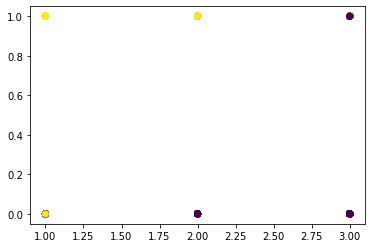

In [159]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.show()

In [160]:
X_train = X
y_train = y

In [163]:
# builing a model
# subclas nn.Module
class TitanicModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=8,out_features=8)
        self.layer_2=nn.Linear(in_features=8,out_features=8)
        self.layer_3=nn.Linear(in_features=8,out_features=1)
        
        self.relu=nn.ReLU()
    
    def forward(self,x):
        return (self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))
    
    
model_A=TitanicModel()
model_A

TitanicModel(
  (layer_1): Linear(in_features=8, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [164]:
# NUM_FEATURES = 8
# NUM_CLASSES = 1
# class TitanicModel(nn.Module):
#     def __init__(self,input_features, output_features, hidden_units=8):
#         super().__init__()
#         self.linear_layer_stack=nn.Sequential(
#             nn.Linear(in_features=input_features,out_features=hidden_units),
#             nn.ReLU(),    
#             nn.Linear(in_features=hidden_units,out_features=hidden_units),
#             nn.ReLU(),
#             nn.Linear(in_features=hidden_units,out_features=output_features),
#         )
     
#     def forward(self,x):
#         return self.linear_layer_stack(x)
    
# model_A=TitanicModel(input_features=NUM_FEATURES,
#                   output_features=NUM_CLASSES,
#                  hidden_units=8)
# model_A

In [165]:
#accuracy function
#calc accuracy
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred)) * 100
    return acc

In [166]:
#loss function
loss_fn= nn.BCEWithLogitsLoss()
# loss_fn=nn.MSELoss()
# loss_fn=nn.L1Loss()
#optimizer
optimizer=torch.optim.SGD(model_A.parameters(),
                          lr=0.01)

In [184]:
i=0
while i<=10:
    i+=1
    #training loop
    torch.manual_seed(42)
    epochs=1000
    for epoch in range(epochs):
        model_A.train()
        y_logits=model_A(X_train).squeeze()
        y_pred= torch.round(torch.sigmoid(y_logits))

        loss=loss_fn(y_logits,y_train)
        acc= accuracy_fn(y_true=y_train,y_pred=y_pred)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if epoch%100==0:
            print(f"Epoch: {epoch} | loss: {loss: .5f}, Acc:{acc:.2f}% ")

Epoch: 0 | loss:  0.39520, Acc:83.16% 
Epoch: 100 | loss:  0.39579, Acc:83.05% 
Epoch: 200 | loss:  0.39557, Acc:83.16% 
Epoch: 300 | loss:  0.39953, Acc:82.27% 
Epoch: 400 | loss:  0.39413, Acc:83.16% 
Epoch: 500 | loss:  0.39822, Acc:82.83% 
Epoch: 600 | loss:  0.39728, Acc:82.94% 
Epoch: 700 | loss:  0.39555, Acc:82.94% 
Epoch: 800 | loss:  0.39650, Acc:83.05% 
Epoch: 900 | loss:  0.39216, Acc:83.50% 
Epoch: 0 | loss:  0.39376, Acc:83.28% 
Epoch: 100 | loss:  0.39426, Acc:82.94% 
Epoch: 200 | loss:  0.39453, Acc:82.94% 
Epoch: 300 | loss:  0.39570, Acc:82.83% 
Epoch: 400 | loss:  0.39229, Acc:83.50% 
Epoch: 500 | loss:  0.39355, Acc:82.94% 
Epoch: 600 | loss:  0.39568, Acc:82.60% 
Epoch: 700 | loss:  0.39354, Acc:83.16% 
Epoch: 800 | loss:  0.39504, Acc:82.94% 
Epoch: 900 | loss:  0.39415, Acc:83.28% 
Epoch: 0 | loss:  0.39217, Acc:83.73% 
Epoch: 100 | loss:  0.39442, Acc:83.05% 
Epoch: 200 | loss:  0.39323, Acc:83.16% 
Epoch: 300 | loss:  0.39555, Acc:82.94% 
Epoch: 400 | loss:  0.

In [185]:
X_train.shape
y_train.shape

torch.Size([891])

In [186]:
testds=pd.read_csv('datasets/TITANICtest.csv')
testds

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [187]:
#preprocessing
testds=testds.drop(columns='Cabin', axis=1)
testds['Age'].fillna(testds['Age'].mean(),inplace=True)
testds['Fare'].fillna(testds['Fare'].mean(),inplace=True)
replacement_mapping_dict = {
    "male": 0,
    "female":1
}
testds["Sex"].replace(replacement_mapping_dict, inplace=True)
replacement_mapping_dict2 = {
    "S": 0,
    "C":1,
    "Q":2
}
testds["Embarked"].replace(replacement_mapping_dict2, inplace=True)
k=[]
for i in testds["Name"]:
    k.append(i)
l=[]
for i in k:
    l.append(i.split(",")[1])
j=[]
for i in l:
    j.append(i.split(".")[0])
testds["titles"]=j
replacement_mapping_dict3 = {
    " Mr": 0,
    " Miss":1,
    " Mrs":2,
    " Master":3,
    " Dr":4,
    " Rev":5,
    " Major":6,
    " Col":7,
    " Mlle":8,
    " Lady":9,
    " Ms":10,
    " Dona":11,
    " Sir":12,
    " Jonkheer":13,
    " Capt":14,
    " Mme":15,
    " the Countess":16,
    
    
    
}
testds["titles"].replace(replacement_mapping_dict3, inplace=True)
#removing name,ticket pid
X_test=testds.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [188]:
testds

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titles
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2,0
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1,11
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0,0
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0,0


In [189]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titles
0,3,0,34.50000,0,0,7.8292,2,0
1,3,1,47.00000,1,0,7.0000,0,2
2,2,0,62.00000,0,0,9.6875,2,0
3,3,0,27.00000,0,0,8.6625,0,0
4,3,1,22.00000,1,1,12.2875,0,2
...,...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0,0
414,1,1,39.00000,0,0,108.9000,1,11
415,3,0,38.50000,0,0,7.2500,0,0
416,3,0,30.27259,0,0,8.0500,0,0


In [190]:
X_test= torch.from_numpy(np.asarray(X_test)).type(torch.float)

In [191]:
X_test

tensor([[ 3.0000,  0.0000, 34.5000,  ...,  7.8292,  2.0000,  0.0000],
        [ 3.0000,  1.0000, 47.0000,  ...,  7.0000,  0.0000,  2.0000],
        [ 2.0000,  0.0000, 62.0000,  ...,  9.6875,  2.0000,  0.0000],
        ...,
        [ 3.0000,  0.0000, 38.5000,  ...,  7.2500,  0.0000,  0.0000],
        [ 3.0000,  0.0000, 30.2726,  ...,  8.0500,  0.0000,  0.0000],
        [ 3.0000,  0.0000, 30.2726,  ..., 22.3583,  1.0000,  3.0000]])

In [192]:
#view first 5 outputs of forward pass on test data
model_A.eval()
with torch.inference_mode():
    y_logits=model_A(X_test)[:5]
y_logits

tensor([[-2.2247],
        [-0.9182],
        [-2.2094],
        [-2.1972],
        [-0.0262]])

In [193]:
#use sigmoid activation funtion on our model logits to tun them into prediction probablities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.0976],
        [0.2853],
        [0.0989],
        [0.1000],
        [0.4934]])

In [194]:
#find the predicted lables
y_preds = torch.round(y_pred_probs)

#in full
y_pred_labels=torch.round(torch.sigmoid(model_A(X_test)))[:5]

# check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [197]:
torch.manual_seed(42)
epochs=1000
for epoch in range(epochs):
    model_A.eval()
    with torch.inference_mode():
        test_logits = model_A(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
#         test_loss= loss_fn(test_logits,y_test)
#         test_acc= accuracy_fn(y_true=y_test,y_pred=test_pred)
        
    if epoch%100==0:
        print(f"Epoch: {epoch}")

Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900


In [198]:
test_pred=test_pred.numpy()


In [201]:
type(test_pred)


numpy.ndarray

In [202]:
k=[]
for i in test_pred:
    k.append(int(i))
np.array(k)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [203]:
d1= {'PassengerId': testds['PassengerId'], 'Survived': k}
df = pd.DataFrame(d1)
df.dtypes
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [204]:
FO=df.to_csv('FinalOutputDL4(30-10).csv',index=False)

In [205]:
Fo=pd.read_csv('FinalOutputDL4(30-10).csv')

In [206]:
Fo

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
